In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(x_train)

numpy.ndarray

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


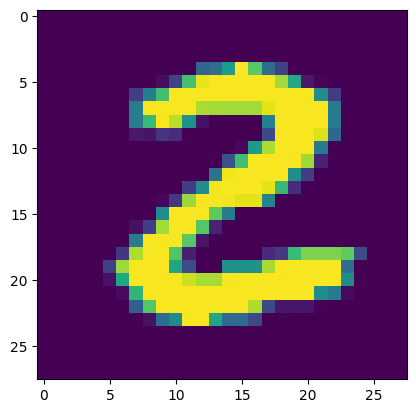

2


In [7]:
plt.imshow(x_train[25])
plt.show()

print(y_train[25])

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [13]:
model.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2989 - accuracy: 0.9141
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0983 - accuracy: 0.9695
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0657 - accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0553 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0474 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0424 - accuracy: 0.9866
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9739
0.9739000201225281


In [16]:
print(x_test.shape)

(10000, 28, 28)


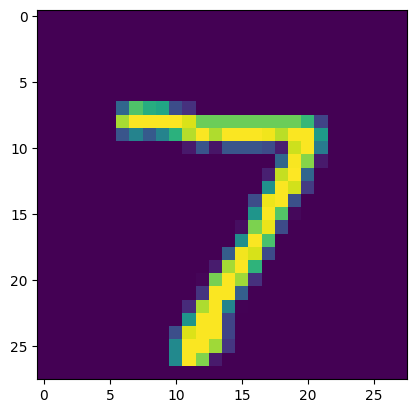

In [17]:
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0])

7


In [19]:
y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(y_pred.shape)

(10000, 10)


In [21]:
print(y_pred[0])

[9.2454371e-04 8.7917820e-03 1.3242423e-02 9.9605525e-01 2.9347520e-04
 5.8681672e-03 5.4142619e-09 9.9999583e-01 6.6986228e-03 5.3377128e-01]


In [22]:
label_for_first_image = np.argmax(y_pred[0])
label_for_first_image

7

In [23]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 958    0    2    2    2    7    3    1    2    3]
 [   0 1122    2    1    0    3    2    1    4    0]
 [   2    0 1002    9    3    1    3    3    8    1]
 [   0    0    3  963    0   26    0    4    6    8]
 [   0    0    2    0  961    0    5    3    0   11]
 [   2    0    0    2    1  877    3    1    4    2]
 [   3    2    1    0    8   15  925    0    4    0]
 [   1    3    6    1    2    1    0 1006    3    5]
 [   4    0    1    5    2    8    1    4  945    4]
 [   1    2    0    5    7    6    1    5    2  980]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

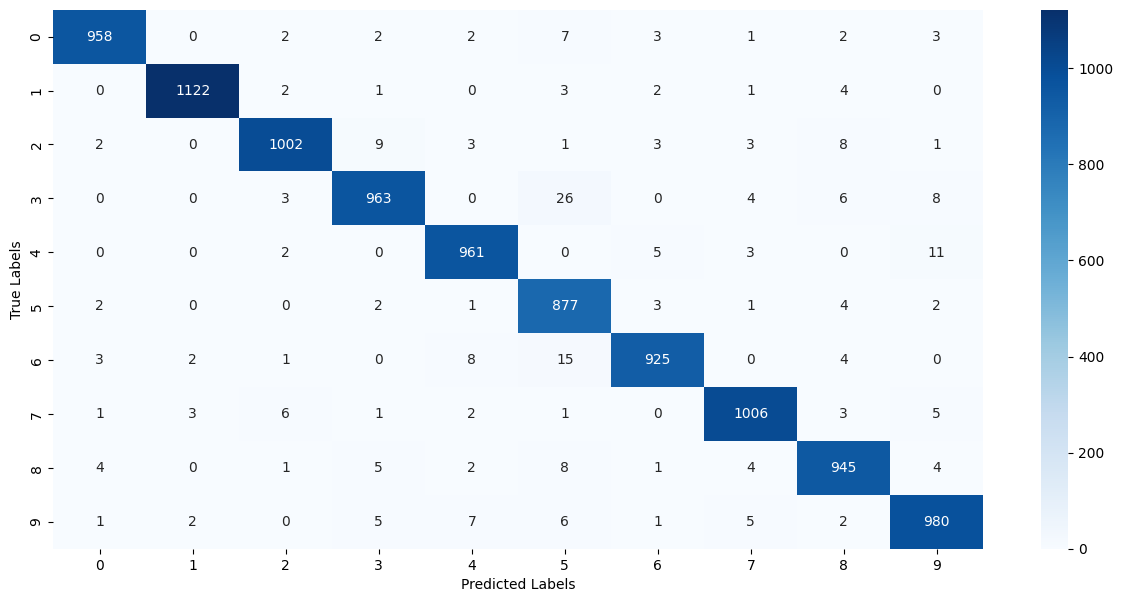

In [25]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [39]:
input_image_path = '/content/test.png'
input_image = cv2.imread(input_image_path)

In [40]:
type(input_image)

numpy.ndarray

In [41]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


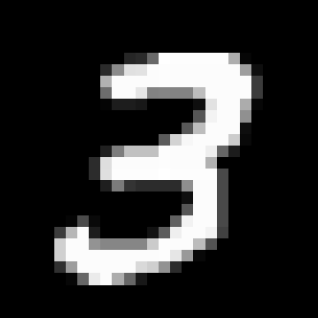

In [42]:
from google.colab.patches import cv2_imshow
cv2_imshow(input_image)

In [43]:
input_image.shape

(318, 318, 3)

In [44]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [45]:
grayscale.shape

(318, 318)

In [46]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [47]:
input_image_resize.shape

(28, 28)

In [48]:
cv2_imshow(input_image_resize)

In [49]:
input_image_resize = input_image_resize / 255

In [50]:
input_reshape = np.reshape(input_image_resize, [1,28,28])

In [51]:
input_prediction = model.predict(input_reshape)
print(input_prediction)

1/1 [==============================] - 0s 36ms/step
[[1.8979729e-09 2.8941441e-02 1.5091632e-01 1.0000000e+00 6.4317308e-16
  8.2475191e-01 6.7232928e-16 4.8091587e-02 1.3148634e-01 5.0675935e-01]]


In [52]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


Path of the image to be predicted : /content/test1.png


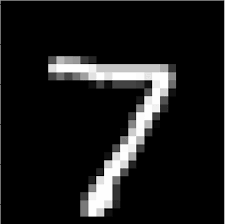

1/1 [==============================] - 0s 24ms/step
The handwritten digit is recognised as  7


In [53]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize / 255

input_reshape = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(input_reshape)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as ', input_pred_label)

Path of the image to be predicted : /content/test.png


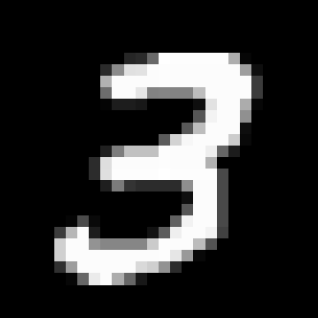

1/1 [==============================] - 0s 24ms/step
The handwritten digit is recognised as  3


In [54]:
input_image_path = input('Path of the image to be predicted : ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize / 255

input_reshape = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(input_reshape)

input_pred_label = np.argmax(input_prediction)

print('The handwritten digit is recognised as ', input_pred_label)